In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Intestine_Intestine_HCLFetalIntestine2"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/db_v1/Intestine_Intestine_HCLFetalIntestine2/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [6]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [5]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


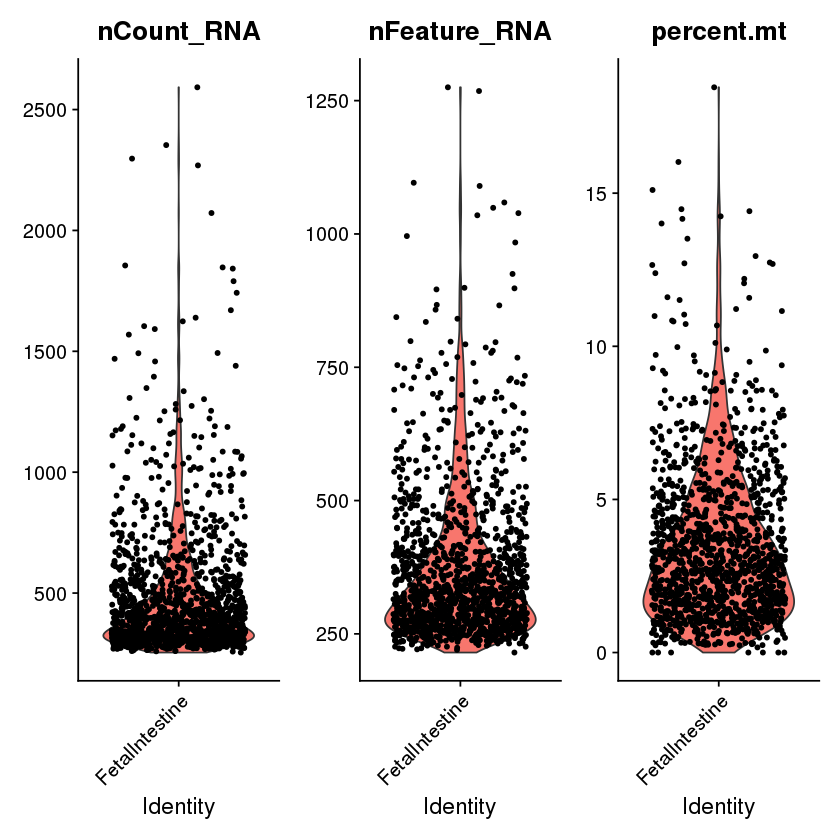

In [6]:
# Pre-processing
min.cells = 10
min.features = 10
nFeature_RNA_range = c(min.features, 800)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [19]:
percent.mt.thre = 8
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [7]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 8070 by 1338

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1338 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 52 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8070 genes



  |======================================================================| 100%


Computing corrected count matrix for 8070 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 50.73616 secs

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  VIM, LGALS1, SPARC, COL1A2, ACTB, COL1A1, TPM1, TMSB4X, CAV1, COL4A1 
	   TAGLN, IGFBP7, MYLK, PLVAP, GNG11, PTN, CALD1, CCL2, FSTL1, TUBA1A 
	   DCN, CD34, RAMP2, A2M, MDK, ACTA2, COL15A1, IFITM2, NREP, POSTN 
Negative:  FABP1, APOA1, FTL, GSTA1, TSPAN8, AFP, AGR3, RPL41, AGR2, RPS18 
	   RPS14, RPL31, SERPINA1, GSTA2, FGB, LGALS3, RPL27A, RBP2, FGG, RPL7 
	   ANXA13, RPS6, SEPP1, TTR, RPS3, RPL34, TXN, RPS27, RPS19, RPS29 
PC_ 2 
Positive:  TUBA1A, GAP43, STMN2, PENK, UCHL1, GRP, TAC1, NEFL, RTN1, TUBB2A 
	   NREP, TUBB2B, PRPH, PCP4, STMN4, CARTPT, SPARC, TAGLN3, MLLT11, LINC00682 
	   COL1A1, COL1A2, STMN1, HOXB5, ELAVL4, MDK, TMEM35A, LRRN3, BEX3, TCEAL7 
Negative:  S100A4, LYZ, MNDA, CSTA, CXCL8, B2M, FCER1G, S100A9, SRGN, ARHGDIB 
	   HLA-DRA, AIF1, CCL3, SELL, CTSS, CCL4, RETN, LST1, PLAC8, LSP1 
	   CCL3L3, CD74, FCN1, S100A8, JAML, TYROBP, CCL4L2, C1orf162, LCP1, IL1B 
PC_ 3 
Positive:  COL15A1, PLVAP, KDR, A2M, CDH5, CD34, CAV1, RAMP2, TM4SF1, PECAM1 
	   E

png 
  2

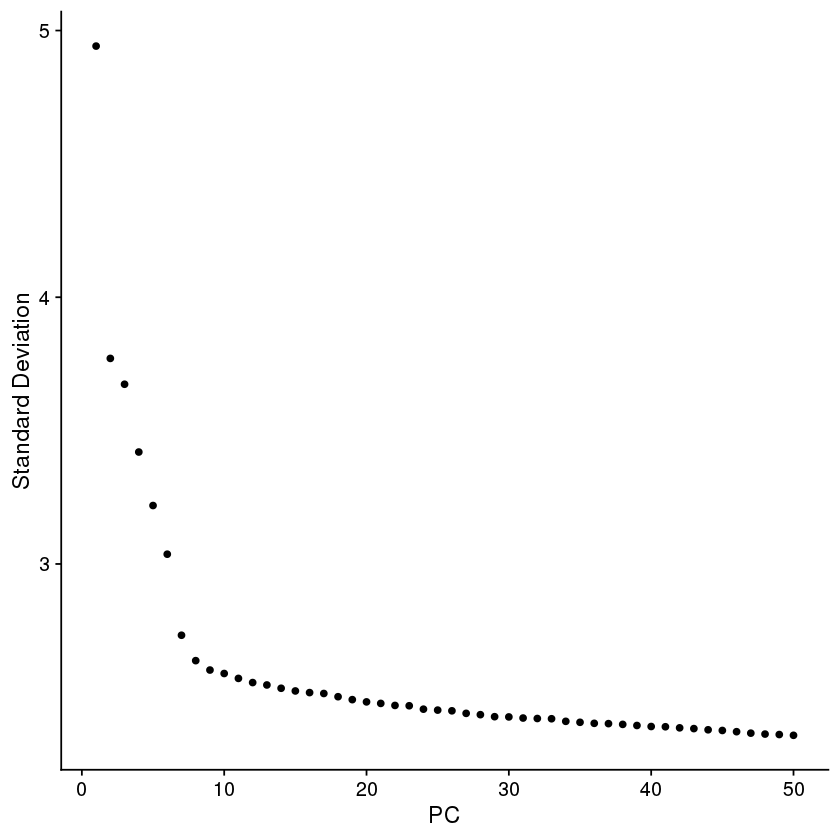

In [8]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [13]:
pcDim = 20 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [23]:
dataobj <- FindClusters(dataobj, resolution = 0.7, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1338
Number of edges: 62344

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.6159
Number of communities: 8
Elapsed time: 0 seconds


ARI 
0.417413

In [24]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

17:31:23 UMAP embedding parameters a = 0.9922 b = 1.112

17:31:23 Read 1338 rows and found 20 numeric columns

17:31:23 Using Annoy for neighbor search, n_neighbors = 30

17:31:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:31:24 Writing NN index file to temp file /tmp/RtmpUHlQN9/fileb7d15b03aa71

17:31:24 Searching Annoy index using 1 thread, search_k = 3000

17:31:25 Annoy recall = 100%

17:31:25 Commencing smooth kNN distance calibration using 1 thread

17:31:26 Initializing from normalized Laplacian + noise

17:31:26 Commencing optimization for 500 epochs, with 53166 positive edges

17:31:31 Optimization finished



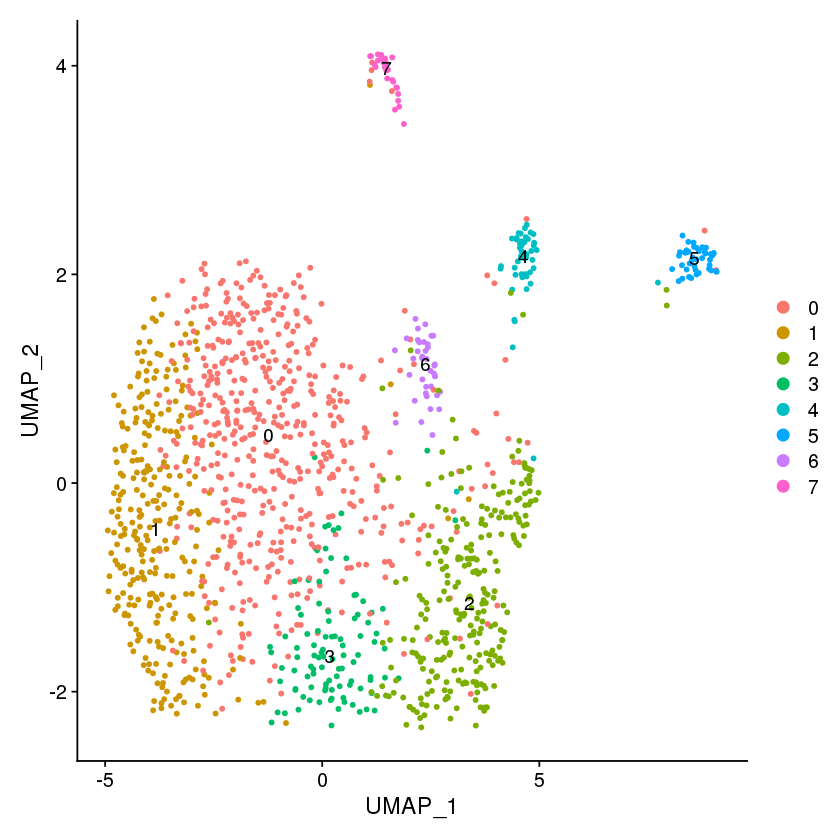

In [25]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

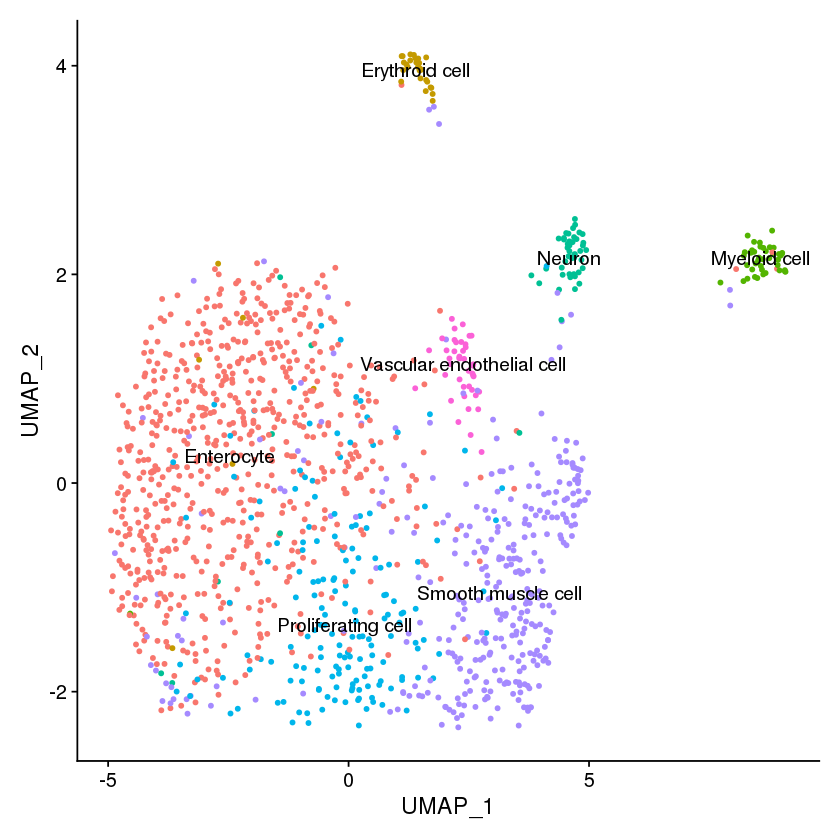

In [26]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [4]:
new.cluster.ids <- c("Intestine-Epithelial tissue-Enterocyte-FABP1", 
                     "Intestine-Epithelial tissue-Enterocyte-RPS18", 
                     "Intestine-Muscle tissue-Smooth muscle cell-COL1A2", 
                     "Intestine-Epithelial tissue-Proliferating T cell-UBE2C",
                     "Intestine-Nerve tissue-Neuron-STMN2", 
                     "Intestine-Connective tissue-Myofibroblast-CSTA", 
                     "Intestine-Epithelial tissue-Vascular endothelial cell-COL15A1",
                     "Unclassified")

In [38]:
subset(dataobj.markers,cluster=='7')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
HBG2,3.691702e-125,3.8773545,1.000,0.028,2.979203e-121,7,HBG2
AHSP,1.950757e-105,1.0421648,0.500,0.004,1.574261e-101,7,AHSP
HBA2,7.072733e-102,3.3072650,0.923,0.032,5.707696e-98,7,HBA2
GYPA,5.696913e-97,0.5462820,0.423,0.002,4.597409e-93,7,GYPA
HBM,7.339013e-76,0.5008196,0.346,0.002,5.922584e-72,7,HBM
HBG1,1.621947e-69,2.5349171,0.962,0.064,1.308911e-65,7,HBG1
HBB,8.106513e-69,1.4385394,0.615,0.020,6.541956e-65,7,HBB
HBA1,1.050666e-43,3.1068099,0.962,0.122,8.478873e-40,7,HBA1
HBZ,7.205981e-37,0.3475002,0.231,0.004,5.815227e-33,7,HBZ


In [5]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [40]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

18:10:48 UMAP embedding parameters a = 0.9922 b = 1.112

18:10:48 Read 1338 rows and found 20 numeric columns

18:10:48 Using Annoy for neighbor search, n_neighbors = 30

18:10:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

18:10:48 Writing NN index file to temp file /tmp/RtmpUHlQN9/fileb7d1681232e9

18:10:48 Searching Annoy index using 1 thread, search_k = 3000

18:10:49 Annoy recall = 100%

18:10:49 Commencing smooth kNN distance calibration using 1 thread

18:10:50 Initializing from normalized Laplacian + noise

18:10:50 Commencing optimization for 500 epochs, with 53166 positive edges

18:10:55 Optimization finished



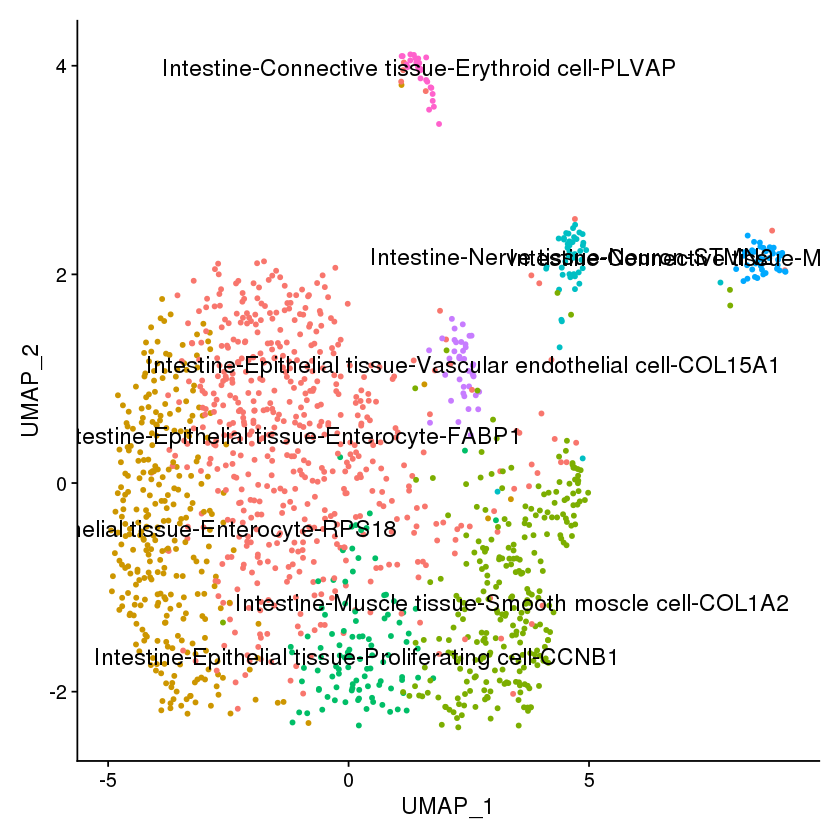

In [41]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [27]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE,)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [42]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [6]:
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [8]:
dataobj.markers <- read.table(file = paste0(datasetName,".seurat.markers.txt"), sep = "\t")

In [10]:
subset(dataobj.markers,V6=='3')

,V1,V2,V3,V4,V5,V6,V7
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
89,1.95543458846799e-41,0.594743378931642,0.58,0.108,1.57803571289367e-37,3,UBE2C
90,5.77795486569278e-34,0.510154108474884,0.6,0.144,4.66280957661407e-30,3,ARL6IP1
91,2.69187670150271e-31,0.556488073200683,0.48,0.095,2.17234449811269e-27,3,HMGB2
92,5.11194654867617e-27,0.357847549491371,0.39,0.069,4.12534086478167e-23,3,CCNB1
93,1.39192561278426e-26,0.406766008399718,0.47,0.106,1.1232839695169e-22,3,KPNA2
94,1.63799996294433e-24,0.443420412561993,0.54,0.151,1.32186597009608e-20,3,PTTG1
95,7.80788425475441e-24,0.396783051285378,0.45,0.108,6.30096259358681e-20,3,TUBB4B
96,1.05388591519558e-21,0.407653188703362,0.46,0.124,8.5048593356283e-18,3,TUBA1C
97,2.8662520646703e-19,0.475915494244923,0.39,0.097,2.31306541618893e-15,3,CALM2


In [3]:
dataobj.dbupload_v1 = readRDS(file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))